# Aula 11 - Explicações em Sistemas de Recomendação - Exercícios

## Importação dos dados (MovieLens 100k)

In [1]:
import pandas as pd
import numpy as np

In [2]:
import wget
!python3 -m wget https://files.grouplens.org/datasets/movielens/ml-100k.zip
!tar -xvzf ml-100k.zip



Saved under ml-100k (1).zip


x ml-100k/
x ml-100k/allbut.pl
x ml-100k/mku.sh
x ml-100k/README
x ml-100k/u.data
x ml-100k/u.genre
x ml-100k/u.info
x ml-100k/u.item
x ml-100k/u.occupation
x ml-100k/u.user
x ml-100k/u1.base
x ml-100k/u1.test
x ml-100k/u2.base
x ml-100k/u2.test
x ml-100k/u3.base
x ml-100k/u3.test
x ml-100k/u4.base
x ml-100k/u4.test
x ml-100k/u5.base
x ml-100k/u5.test
x ml-100k/ua.base
x ml-100k/ua.test
x ml-100k/ub.base
x ml-100k/ub.test


In [3]:
#Types of genres
genre = pd.read_csv('./ml-100k/u.genre', sep="|", encoding='latin-1', header=None)
genre.drop(genre.columns[1], axis=1, inplace=True)
genre.columns = ['Genres']
genre_list = list(genre['Genres'])
genre_list

['unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [4]:
#Types of occupations
occupation = pd.read_csv('./ml-100k/u.occupation', sep="|", encoding='latin-1', header=None)
occupation.columns = ['Occupations']
occupation_list = list(occupation['Occupations'])
occupation_list

['administrator',
 'artist',
 'doctor',
 'educator',
 'engineer',
 'entertainment',
 'executive',
 'healthcare',
 'homemaker',
 'lawyer',
 'librarian',
 'marketing',
 'none',
 'other',
 'programmer',
 'retired',
 'salesman',
 'scientist',
 'student',
 'technician',
 'writer']

In [5]:
#Load the Ratings data
data = pd.read_csv('./ml-100k/u.data', sep="\t", header=None)
data.columns = ['userId', 'movieId', 'rating', 'timestamp']
data.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
#Load the Movies data
item = pd.read_csv('./ml-100k/u.item', sep="|", encoding='latin-1', header=None)
item.columns = ['movieId', 'title' ,'release','video release date', 'IMDb URL', 'unknown', 'Action', 
                'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 
                'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
item['release'] = pd.to_datetime(item['release'])
item = item[pd.notnull(item['release'])]
item['year'] = item['release'].dt.year.astype(int)
item.drop(columns=['release', 'video release date', 'IMDb URL'], inplace=True)
item.head()

,movieId,title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1995


In [7]:
df_meta = item.melt(id_vars=['movieId', 'title'], var_name='genre')
df_meta = df_meta[df_meta.value == 1]
df_meta.drop(columns=['value'], inplace=True)
df_meta.head()

,movieId,title,genre
1371,1373,Good Morning (1971),unknown
1682,2,GoldenEye (1995),Action
1684,4,Get Shorty (1995),Action
1697,17,From Dusk Till Dawn (1996),Action
1701,21,Muppet Treasure Island (1996),Action


In [8]:
#Load the User data
user = pd.read_csv('./ml-100k/u.user', sep="|", encoding='latin-1', header=None)
user.columns = ['userId', 'age', 'gender', 'occupation', 'zip code']
user.head()

,userId,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


## Abordagens intrínsecas ao modelo

***Exercício 01:*** Utilize o algoritmo UserKNN (pode ser do CaseRecommender) para gerar recomendações para um usuário aleatório da base. Forneça uma explicação para uma das recomendações geradas. Dica: sua explicação pode ser na forma de um gráfico, veja o slide 13 "explicações baseadas em usuários ou itens relaventes".

In [45]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Save train and test sets to files
train.to_csv('train.dat', index=False, header=False, sep='\t')
test.to_csv('test.dat', index=False, header=False, sep='\t')

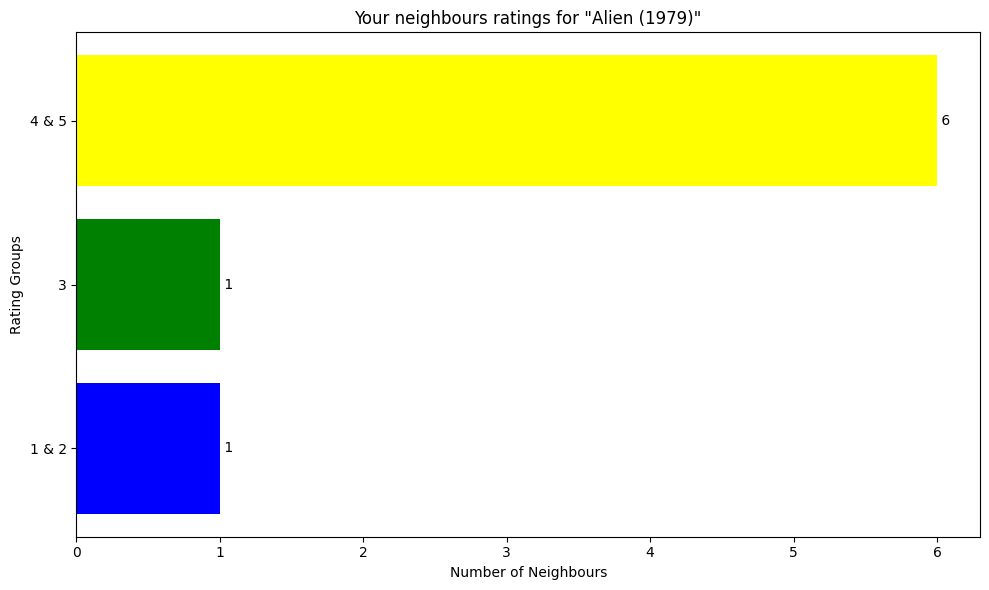


Recommendations for User 301:
- Alien (1979) (Score: 6.32)
- Terminator, The (1984) (Score: 6.32)
- Independence Day (ID4) (1996) (Score: 5.85)
- Four Weddings and a Funeral (1994) (Score: 5.38)
- Jaws (1975) (Score: 5.37)

Explanation: 6 of your similar neighbors rated this movie highly (4 or 5),


In [144]:
from caserec.recommenders.item_recommendation.userknn import UserKNN
import matplotlib.pyplot as plt
import random

# Create and train UserKNN model
user_knn = UserKNN(train_file='train.dat', test_file='test.dat', output_file='output_userknn.dat', as_similar_first=True, k_neighbors=15)  

# Train the model and get predictions
user_knn.compute(verbose=False, verbose_evaluation=False)

# Select random user
random_user = random.choice(train['userId'].unique())

# Read the predictions from the output file
predictions = pd.read_csv('output_userknn.dat', sep='\t', names=['user', 'item', 'score'])

# Get recommendations for our random user
user_recommendations = predictions[predictions['user'] == random_user].sort_values(
    by='score', ascending=False).head(5)

# Get the top recommended movie
recommended_movie_id = user_recommendations.iloc[0]['item']
recommended_movie = item[item['movieId'] == recommended_movie_id]['title'].iloc[0]

# Find similar users based on rating patterns
user_ratings = train[train['userId'] == random_user]
other_users = train[train['userId'] != random_user]

# Get the k most similar users (neighbors)
similar_users = []
for other_user in other_users['userId'].unique():
    other_ratings = train[train['userId'] == other_user]
    # Find common movies
    common_movies = set(user_ratings['movieId']) & set(other_ratings['movieId'])
    if len(common_movies) > 0:
        similar_users.append(other_user)
    if len(similar_users) >= 15:  # Limit to 15 neighbors
        break

# Get ratings from neighbors for the recommended movie
neighbor_ratings = train[
    (train['movieId'] == recommended_movie_id) & 
    (train['userId'].isin(similar_users))
]['rating']

ratings_count = neighbor_ratings.value_counts().sort_index()

# Create visualization
plt.figure(figsize=(10, 6))

# Create horizontal bars for grouped ratings
y_pos = np.arange(3)  # 1 & 2, 3, 4 & 5

# Combine counts for ratings 1-2 and 4-5
counts = [
    ratings_count.get(1, 0) + ratings_count.get(2, 0),  # Ratings 1-2 
    ratings_count.get(3, 0),  # Rating 3
    ratings_count.get(4, 0) + ratings_count.get(5, 0)   # Ratings 4-5
]

colors = ['blue', 'green', 'yellow']  # Blue for 1-2, Green for 3, Yellow for 4-5

plt.barh(y_pos, counts, color=colors)
plt.yticks(y_pos, ['1 & 2', '3', '4 & 5'])
plt.xlabel('Number of Neighbours')
plt.ylabel('Rating Groups')
plt.title(f'Your neighbours ratings for "{recommended_movie}"')

# Add value labels on the bars
for i, v in enumerate(counts):  
    if v > 0:  # Only add label if there are ratings
        plt.text(v, i, f' {v}', va='center')
plt.tight_layout()
plt.show()

print(f"\nRecommendations for User {random_user}:")
for _, row in user_recommendations.iterrows():
    movie_title = item[item['movieId'] == row['item']]['title'].iloc[0]
    print(f"- {movie_title} (Score: {row['score']:.2f})")

# Print explanation about neighbor ratings
positive_ratings = counts[2]  # Index 2 contains ratings 4-5
if positive_ratings > 0:
    print(f"\nExplanation: {positive_ratings} of your similar neighbors rated this movie highly (4 or 5),")



***Exercício 02:*** Seguindo a mesma ideia do exercício anterior, forneça uma explicação de uma recomendação para um usuário com base no algoritmo ItemKNN.

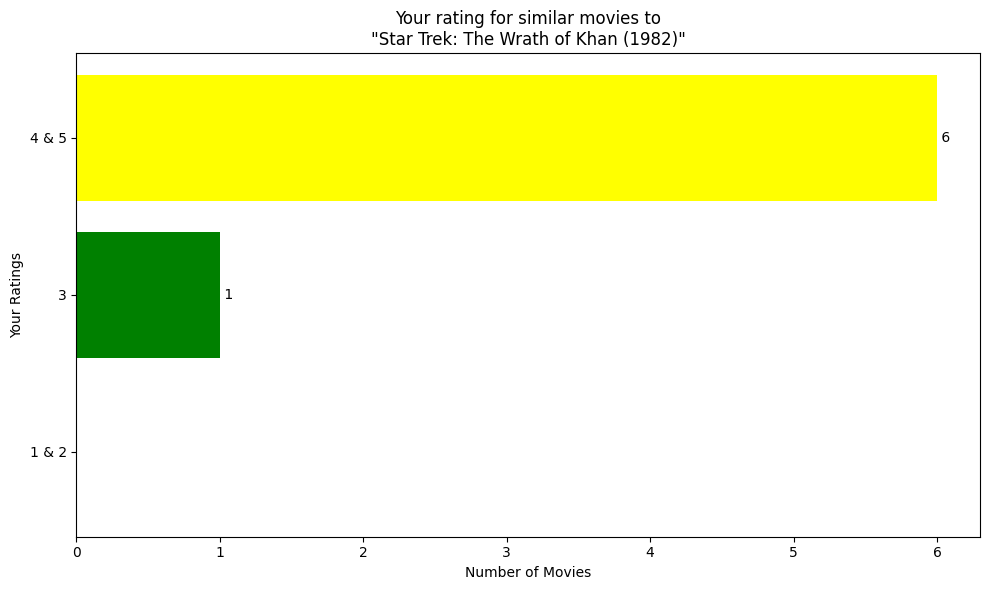


Recommendations for User 622:
- Star Trek: The Wrath of Khan (1982) (Score: 8.09)
- Speed (1994) (Score: 6.89)
- Blade Runner (1982) (Score: 6.66)
- Forrest Gump (1994) (Score: 6.61)
- Independence Day (ID4) (1996) (Score: 6.47)

Explanation: You rated 7 similar movies, and gave high ratings (4 or 5) to 6 of them.


In [135]:
from caserec.recommenders.item_recommendation.itemknn import ItemKNN

# Create and train ItemKNN model
item_knn = ItemKNN(train_file='train.dat', test_file='test.dat', output_file='output_itemknn.dat', k_neighbors=15)

# Train the model and get predictions
item_knn.compute(verbose=False, verbose_evaluation=False)

# Select random user
random_user = random.choice(train['userId'].unique())

# Read predictions
predictions = pd.read_csv('output_itemknn.dat', sep='\t', names=['user', 'item', 'score'])

# Get recommendations for our random user
user_recommendations = predictions[predictions['user'] == random_user].sort_values(
    by='score', ascending=False).head(5)

# Get the top recommended movie
recommended_movie_id = user_recommendations.iloc[0]['item']
recommended_movie = item[item['movieId'] == recommended_movie_id]['title'].iloc[0]

# Find similar items based on genre patterns
recommended_movie_genres = item[item['movieId'] == recommended_movie_id].iloc[0][genre_list]
similar_items = []

for _, movie in item.iterrows():
    if movie['movieId'] != recommended_movie_id:
        # Calculate genre similarity
        genre_similarity = sum([1 for genre in genre_list if movie[genre] == recommended_movie_genres[genre] == 1])
        
        if genre_similarity > 0:
            similar_items.append(movie['movieId'])
    if len(similar_items) >= 15:  # Limit to 15 similar items
        break

# Get ratings from this specific user for similar movies they've watched
user_similar_ratings = train[
    (train['userId'] == random_user) & 
    (train['movieId'].isin(similar_items))
]['rating']

ratings_count = user_similar_ratings.value_counts().sort_index()

# Create visualization
plt.figure(figsize=(10, 6))

# Create horizontal bars for grouped ratings
y_pos = np.arange(3)  # 1 & 2, 3, 4 & 5

# Combine counts for ratings 1-2 and 4-5
counts = [
    ratings_count.get(1, 0) + ratings_count.get(2, 0),  # Ratings 1-2 
    ratings_count.get(3, 0),  # Rating 3
    ratings_count.get(4, 0) + ratings_count.get(5, 0)   # Ratings 4-5
]

colors = ['blue', 'green', 'yellow']  # blue for 1-2, green for 3, yellow for 4-5

plt.barh(y_pos, counts, color=colors)
plt.yticks(y_pos, ['1 & 2', '3', '4 & 5'])
plt.xlabel('Number of Movies')
plt.ylabel('Your Ratings')
plt.title(f'Your rating for similar movies to\n"{recommended_movie}"')

# Add value labels on the bars
for i, v in enumerate(counts):  
    if v > 0:  # Only add label if there are ratings
        plt.text(v, i, f' {v}', va='center')
plt.tight_layout()
plt.show()

print(f"\nRecommendations for User {random_user}:")
for _, row in user_recommendations.iterrows():
    movie_title = item[item['movieId'] == row['item']]['title'].iloc[0]
    print(f"- {movie_title} (Score: {row['score']:.2f})")

# Print additional context
total_similar_rated = sum(counts)
if total_similar_rated > 0:
    high_ratings = counts[2]  # Number of 4-5 star ratings
    print(f"\nExplanation: You rated {total_similar_rated} similar movies, and gave high ratings (4 or 5) to {high_ratings} of them.")

***Exercício 03:*** Forneça uma explicação de uma recomendação para um usuário com base no algoritmo ItemAttributeKNN. Utilize o template: "Estou te recomendando X pois este filme possui os mesmos gêneros A, B e C que o filme Y que você já assistiu e gostou".
- X, Y : título de um filme
- A, B, C : gênero

In [82]:
from caserec.recommenders.item_recommendation.item_attribute_knn import ItemAttributeKNN

# Create a file with item attributes (genres)
genre_data = []
for _, movie in item.iterrows():
    movie_genres = [genre for genre in genre_list if movie[genre] == 1]
    genre_str = ','.join(movie_genres)
    genre_data.append(f"{movie['movieId']}\t{genre_str}")

# Save genre data to a file
with open('movie_genres.dat', 'w') as f:
    f.write('\n'.join(genre_data))

# Create and train ItemAttributeKNN model
item_attr_knn = ItemAttributeKNN(
    train_file='train.dat',
    test_file='test.dat',
    metadata_file='movie_genres.dat',
    output_file='output_itemattrknn.dat',
    k_neighbors=15, 
    as_similar_first=True
)

# Train the model and get predictions
item_attr_knn.compute(verbose=False, verbose_evaluation=False)

# Select random user
random_user = random.choice(train['userId'].unique())

# Read predictions
predictions = pd.read_csv('output_itemattrknn.dat', sep='\t', names=['user', 'item', 'score'])

# Get recommendations for our random user
user_recommendations = predictions[predictions['user'] == random_user].sort_values(
    by='score', ascending=False).head(5)

# Get the top recommended movie
recommended_movie_id = user_recommendations.iloc[0]['item']
recommended_movie = item[item['movieId'] == recommended_movie_id]
recommended_movie_title = recommended_movie['title'].iloc[0]

# Get genres of recommended movie
recommended_genres = [genre for genre in genre_list 
                     if recommended_movie[genre].iloc[0] == 1]

# Find movies this user has rated highly (4 or 5 stars)
user_liked_movies = train[(train['userId'] == random_user) & 
                         (train['rating'] >= 4)]

# Find a similar movie the user liked that shares the most genres
best_match = None
max_shared_genres = 0

for _, rating in user_liked_movies.iterrows():
    liked_movie = item[item['movieId'] == rating['movieId']]
    liked_genres = [genre for genre in genre_list 
                   if liked_movie[genre].iloc[0] == 1]
    
    shared_genres = set(recommended_genres) & set(liked_genres)
    if len(shared_genres) > max_shared_genres:
        max_shared_genres = len(shared_genres)
        best_match = {
            'title': liked_movie['title'].iloc[0],
            'shared_genres': shared_genres
        }

print(f"\nRecommendations for User {random_user}:")
for _, row in user_recommendations.iterrows():
    movie_title = item[item['movieId'] == row['item']]['title'].iloc[0]
    print(f"- {movie_title} (Score: {row['score']:.2f})")

if best_match:
    print(f"\nExplanation:")
    print(f"I am recommending you '{recommended_movie_title}' because this movie")
    print(f"has the same genres ({', '.join(best_match['shared_genres'])}) as")
    print(f"'{best_match['title']}' that you have already seen and liked.")


Recommendations for User 69:
- Natural Born Killers (1994) (Score: 4.00)
- Supercop (1992) (Score: 4.00)
- Die Hard (1988) (Score: 4.00)
- Die Hard 2 (1990) (Score: 4.00)
- River Wild, The (1994) (Score: 4.00)

Explanation:
I am recommending you 'Natural Born Killers (1994)' because this movie
has the same genres (Thriller, Action) as
'Rock, The (1996)' that you have already seen and liked.


## Abordagem agnóstica ao modelo

***Exercício 04:*** Pense e implemente uma estratégia de explicação agnóstica ao modelo: utilize o BPRMF para calcular recomencações, e depois implemente outra estratégia para explicar uma das recomendações para um usuário.

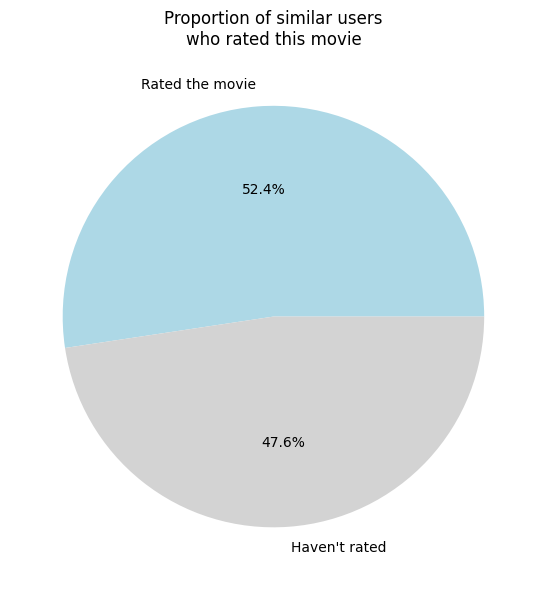


Recommendations for User 62:
- Star Wars (1977) (Score: 5.91)
- Aliens (1986) (Score: 5.77)
- Dead Poets Society (1989) (Score: 5.65)
- Princess Bride, The (1987) (Score: 5.54)
- Fugitive, The (1993) (Score: 5.51)

Explanation for recommending 'Star Wars (1977)':
We found 861 users who liked the same movies as you.
Among them, 451 users have watched this movie.


In [113]:
from caserec.recommenders.item_recommendation.bprmf import BprMF

# Create and train BPRMF model
bprmf = BprMF(train_file='train.dat', test_file='test.dat', output_file='output_bprmf.dat', factors=10, learn_rate=0.05, epochs=30)

# Train the model
bprmf.compute(verbose=False, verbose_evaluation=False)

# Read predictions
predictions = pd.read_csv('output_bprmf.dat', sep='\t', names=['user', 'item', 'score'])

# Select random user
random_user = random.choice(train['userId'].unique())

# Get recommendations for our random user
user_recommendations = predictions[predictions['user'] == random_user].sort_values(
    by='score', ascending=False).head(5)

# Get the top recommended movie
recommended_movie_id = user_recommendations.iloc[0]['item']
recommended_movie = item[item['movieId'] == recommended_movie_id]
recommended_title = recommended_movie['title'].iloc[0]

# Find movies that chosen user liked (rated 4 or 5)
user_liked_movies = set(train[
    (train['userId'] == random_user) &
    (train['rating'] >= 4)
]['movieId'])

# Find users who liked the same movies
similar_users = train[
    (train['movieId'].isin(user_liked_movies)) &
    (train['rating'] >= 4)
]['userId'].unique()

# Get ratings from similar users for the recommended movie
similar_users_ratings = train[
    (train['userId'].isin(similar_users)) &
    (train['movieId'] == recommended_movie_id)
]

# Create visualization
plt.figure(figsize=(8, 6))

# Plot: Proportion of Similar Users who rated the movie
total_similar_users = len(similar_users)
users_who_rated = len(similar_users_ratings)
sizes = [users_who_rated, total_similar_users - users_who_rated]
labels = ['Rated the movie', 'Haven\'t rated']
colors = ['lightblue', 'lightgray']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Proportion of similar users\nwho rated this movie')

plt.tight_layout()
plt.show()

# Print recommendations and explanation
print(f"\nRecommendations for User {random_user}:")
for _, row in user_recommendations.iterrows():
    movie_title = item[item['movieId'] == row['item']]['title'].iloc[0]
    print(f"- {movie_title} (Score: {row['score']:.2f})")

print(f"\nExplanation for recommending '{recommended_title}':")
print(f"We found {total_similar_users} users who liked the same movies as you.")
if users_who_rated > 0:
    print(f"Among them, {users_who_rated} users have watched this movie.")
else:
    print("However, none of these users have rated this movie yet.")